In [1]:
pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB 660.6 kB/s eta 0:00:05
     --- ------------------------------------ 0.3/3.0 MB 3.2 MB/s eta 0:00:01
     --------- ------------------------------ 0.7/3.0 MB 5.8 MB/s eta 0:00:01
     ------------ --------------------------- 0.9/3.0 MB 5.4 MB/s eta 0:00:01
     -------------- ------------------------- 1.1/3.0 MB 5.0 MB/s eta 0:00:01
     ----------------- ---------------------- 1.3/3.0 MB 4.7 MB/s eta 0:00:01
     ------------------- -------------------- 1.4/3.0 MB 4.8 MB/s eta 0:00:01
     ------------------- -------------------- 1.4/3.0 MB 4.8 MB/s eta 0:00:01
     ------------------- -------------------- 1.4/3.0 MB 4.8 MB/s eta 0:00:01
     ------------------- -------------------- 1.5/3.0 MB 3.3 MB/s eta 0:00:01
     --------------------------- ------------ 2.1/3.0 MB 4.4 MB/s eta 0:00:01
     ------------------------------ --------- 2.2/3.0 MB 4.3 MB/s eta

In [2]:
import yfinance as yf
import pandas as pd


In [3]:
df = yf.download('WIPRO.NS')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,1.1250,1.1250,1.1250,1.1250,0.908191,19999
1996-01-02,1.0375,1.0375,1.0375,1.0375,0.837554,39999
1996-01-03,1.0750,1.0750,1.0750,1.0750,0.867827,19999
1996-01-04,1.0750,1.0750,1.0750,1.0750,0.867827,119999
1996-01-05,1.0750,1.0750,1.0750,1.0750,0.867827,0


In [4]:
import numpy as np
import math 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

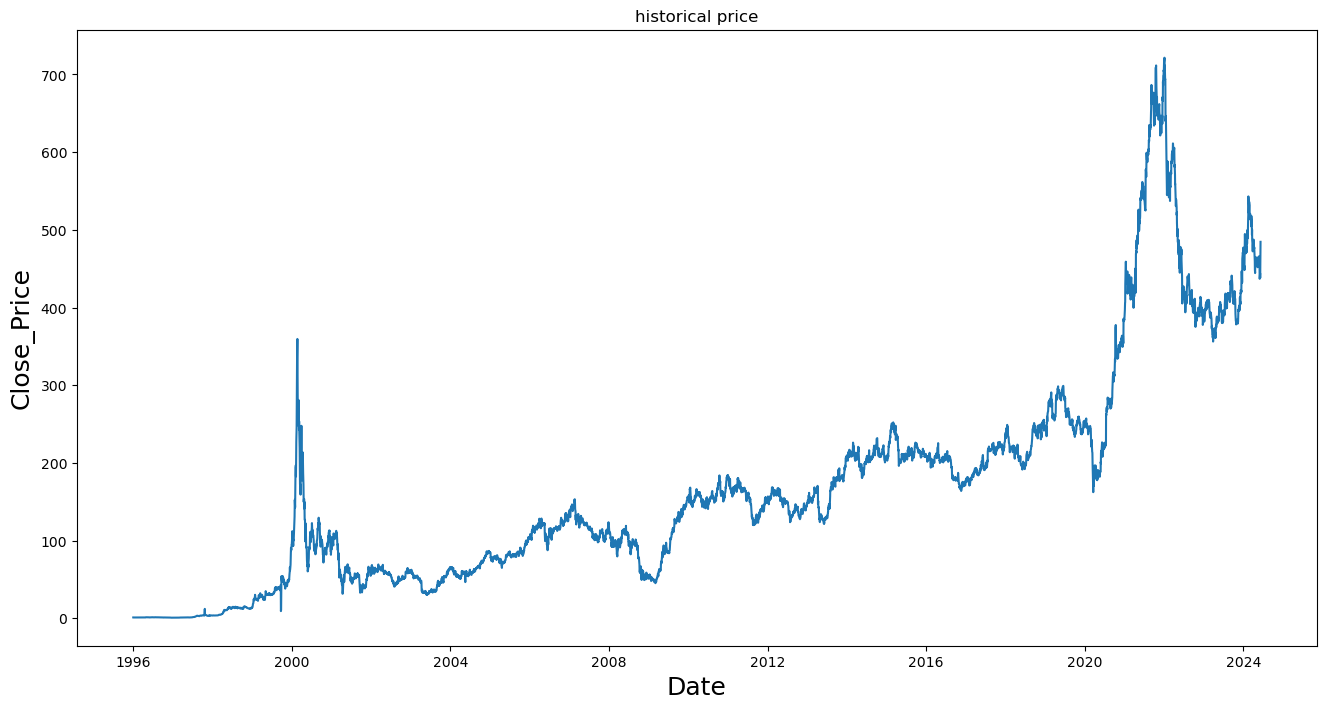

In [5]:
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.show()

In [6]:
data = df.filter(['Close'])
df = np.array(data).reshape(-1,1)
df

array([[  1.125     ],
       [  1.03750002],
       [  1.07500005],
       ...,
       [451.5       ],
       [461.        ],
       [484.54998779]])

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(np.array(df).reshape(-1,1))
scaled_df

array([[4.96023166e-04],
       [3.74618934e-04],
       [4.26649366e-04],
       ...,
       [6.25381123e-01],
       [6.38562157e-01],
       [6.71237231e-01]])

In [9]:
scaled_df
training_data_len = math.ceil(len(scaled_df)*0.8)
training_data_len

5716

In [10]:
train_data = scaled_df[0:training_data_len , :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00049602, 0.00037462, 0.00042665, 0.00042665, 0.00042665,
       0.00042665, 0.00042665, 0.00042873, 0.00042665, 0.00042665,
       0.00042665, 0.00039196, 0.00039196, 0.00041971, 0.00039196,
       0.00041971, 0.00039196, 0.00039196, 0.00039196, 0.00039196,
       0.00039196, 0.00038   , 0.00038   , 0.00038   , 0.00042665,
       0.00042665, 0.00039196, 0.00039196, 0.00039196, 0.00039196,
       0.0004263 , 0.0004263 , 0.0004263 , 0.0004263 , 0.00049602,
       0.00049602, 0.00049602, 0.00049602, 0.00049602, 0.00049602,
       0.00049602, 0.00044399, 0.00049602, 0.00049602, 0.00049602,
       0.00049602, 0.00049602, 0.00049602, 0.00049602, 0.00048735,
       0.00048735, 0.00049602, 0.00039214, 0.00039214, 0.00041277,
       0.00046134, 0.00046151, 0.00046151, 0.00046151, 0.00046151])]
[0.00046150960565661376]



In [11]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(5656, 60, 1)

In [12]:
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences = False))   
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size=40, epochs=20)



Epoch 1/20


C:\Users\Public\.Public Documents\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0039
Epoch 2/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 9.4440e-05
Epoch 3/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 1.0311e-04
Epoch 4/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 8.1827e-05
Epoch 5/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 7.6012e-05
Epoch 6/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 7.1480e-05
Epoch 7/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 6.5594e-05
Epoch 8/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 6.3456e-05
Epoch 9/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 6.7017e-05
Epoch 10/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 6.3910e-05
Epoch 11/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 5.5094e-05
Epoch 12/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 5.5700e-05
Epoch 13/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 5.4197e-05
Epoch 14/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 6.1372e-05
Ep

In [13]:
test_data = scaled_df[training_data_len - 60: , :]
x_test = []
y_test = df[training_data_len: , :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [14]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


5.478704436486509

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1000\3699947006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['predictions'] = predictions


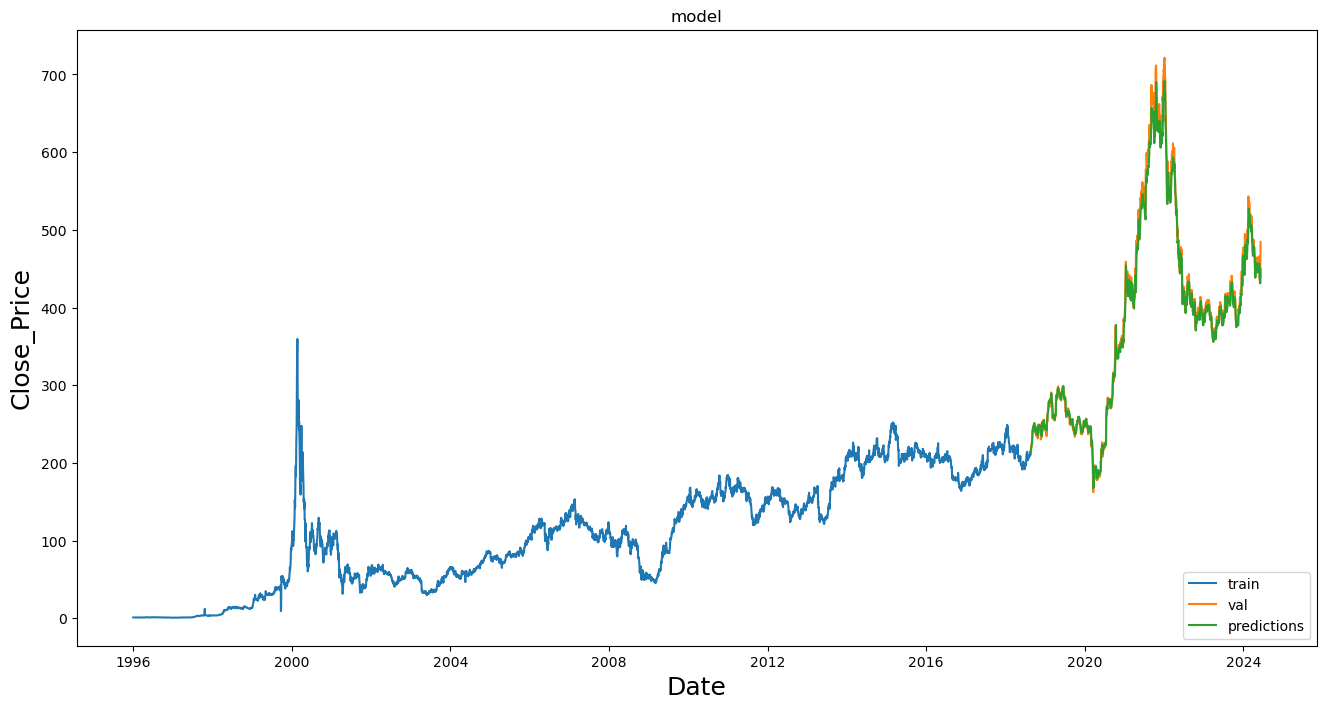

In [15]:
train = data[:training_data_len]
val = data[training_data_len:]
val['predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(val[['Close','predictions']],)
plt.legend(['train', 'val', 'predictions'], loc = 'lower right')
plt.show()

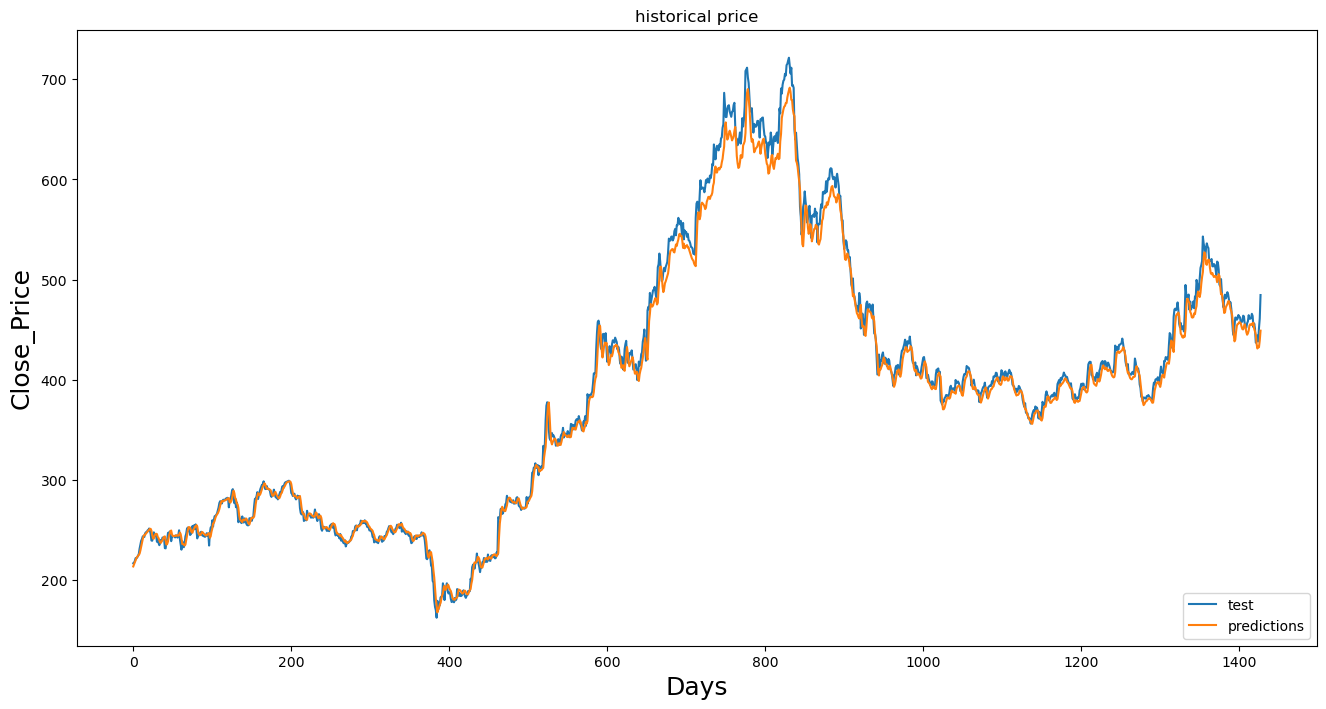

In [16]:
test = df[training_data_len:]
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(test)
plt.plot(predictions)
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.legend(['test', 'predictions'], loc = 'lower right')
plt.show()